In [2]:
#matplotlib notebook
import h5py
import nibabel as nib
import numpy as np
import time
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
work_dir = Path('/mnt/share/students/studfruem1/petbc_lesions')
hdf5_path = work_dir.joinpath('petbc_lesions_pet_test.h5')

### Loading nii data in hdf5 file (don't run this, if you've already created the .h5 file)

In [6]:
with h5py.File(hdf5_path, 'a') as hdf: 
    i = 0
    for subj_dir in work_dir.glob('0*'):
        subj_id = subj_dir.name
        print(subj_dir)

        # load data from nii files
        #nii_label = next(subj_dir.glob('**/iso*.nii.gz'))
        #img_label = nib.load(nii_label) # unint8 -> ok
        #common_affine = img_label.affine
        #img_label = img_label.get_fdata().astype(np.uint8)
        
        #nii_ct = next(subj_dir.glob('**/rs*ct.nii'))
        #img_ct = nib.load(nii_ct) # int16 -> ok
        #img_ct = img_ct.get_fdata().astype(np.int16)
        
        nii_petsuv = next(subj_dir.glob('**/*petsuv.nii'))
        img_petsuv = nib.load(nii_petsuv) # float64 -> float16
        common_affine = img_petsuv.affine
        img_petsuv = img_petsuv.get_fdata().astype(np.float16)

        # create hdf5 dataset
        grp = hdf.require_group('petsuv')
        ds = grp.require_dataset(subj_id, img_petsuv.shape, dtype=img_petsuv.dtype)
        ds[...] = img_petsuv
        ds.attrs['affine'] = common_affine
        
        #grp = hdf.require_group('ct')
        #ds = grp.require_dataset(subj_id, img_ct.shape, dtype=img_ct.dtype)
        #ds[...] = img_ct
        #ds.attrs['affine'] = common_affine
        
        #grp = hdf.require_group('label')
        #ds = grp.require_dataset(subj_id, img_label.shape, dtype=img_label.dtype)
        #ds[...] = img_label
        #ds.attrs['affine'] = common_affine

/mnt/share/students/studfruem1/petbc_lesions/0001
/mnt/share/students/studfruem1/petbc_lesions/0002
/mnt/share/students/studfruem1/petbc_lesions/0003
/mnt/share/students/studfruem1/petbc_lesions/0181
/mnt/share/students/studfruem1/petbc_lesions/0004
/mnt/share/students/studfruem1/petbc_lesions/0182
/mnt/share/students/studfruem1/petbc_lesions/0005
/mnt/share/students/studfruem1/petbc_lesions/0183
/mnt/share/students/studfruem1/petbc_lesions/0184
/mnt/share/students/studfruem1/petbc_lesions/0007
/mnt/share/students/studfruem1/petbc_lesions/0010
/mnt/share/students/studfruem1/petbc_lesions/0011
/mnt/share/students/studfruem1/petbc_lesions/0012
/mnt/share/students/studfruem1/petbc_lesions/0013
/mnt/share/students/studfruem1/petbc_lesions/0014
/mnt/share/students/studfruem1/petbc_lesions/0015
/mnt/share/students/studfruem1/petbc_lesions/0016
/mnt/share/students/studfruem1/petbc_lesions/0018
/mnt/share/students/studfruem1/petbc_lesions/0020
/mnt/share/students/studfruem1/petbc_lesions/0021


/mnt/share/students/studfruem1/petbc_lesions/0195
/mnt/share/students/studfruem1/petbc_lesions/0196
/mnt/share/students/studfruem1/petbc_lesions/0197
/mnt/share/students/studfruem1/petbc_lesions/0198
/mnt/share/students/studfruem1/petbc_lesions/0199
/mnt/share/students/studfruem1/petbc_lesions/0200
/mnt/share/students/studfruem1/petbc_lesions/0201
/mnt/share/students/studfruem1/petbc_lesions/0202
/mnt/share/students/studfruem1/petbc_lesions/0203
/mnt/share/students/studfruem1/petbc_lesions/0204
/mnt/share/students/studfruem1/petbc_lesions/0205
/mnt/share/students/studfruem1/petbc_lesions/0206
/mnt/share/students/studfruem1/petbc_lesions/0207
/mnt/share/students/studfruem1/petbc_lesions/0208
/mnt/share/students/studfruem1/petbc_lesions/0209
/mnt/share/students/studfruem1/petbc_lesions/0210
/mnt/share/students/studfruem1/petbc_lesions/0211
/mnt/share/students/studfruem1/petbc_lesions/0212
/mnt/share/students/studfruem1/petbc_lesions/0213
/mnt/share/students/studfruem1/petbc_lesions/0214


## Dataset loading benchmark

In [78]:
# select 10 test subjects
subject_dirs = list(work_dir.glob('0*'))
subject_dirs = subject_dirs[:10]
subjects = [subj.name for subj in subject_dirs]

### HDF5 vs NIBABEL loading (petsuv, ct and label)

In [101]:
# start timer
t = time.perf_counter()

# load 10 test subject datasets to memory
with h5py.File(hdf5_path, 'r') as hdf: 
    for subj_id in subjects:
        img_ct = hdf[f'ct/{subj_id}'][...]
        img_pet = hdf[f'petsuv/{subj_id}'][...]
        img_label = hdf[f'label/{subj_id}'][...]
        
print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 2.9970040500629693s


In [102]:
# start timer
t = time.perf_counter()
for subj_dir in subject_dirs:
        subj_id = subj_dir.name
        # load data from nii files
        img_label = nib.load(subj_dir.joinpath(f'sequences/{subj_dir.name}_petsuv.nii')) 
        img_label = img_label.get_fdata()
        
        img_ct = nib.load(subj_dir.joinpath(f'sequences/rs_{subj_dir.name}_ct.nii')) 
        img_ct = img_ct.get_fdata()

        img_petsuv = nib.load(subj_dir.joinpath(f'labels/iso_{subj_dir.name}_tumor.nii.gz')) 
        img_petsuv = img_petsuv.get_fdata()
print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 13.92522418498993s


### HDF5 vs NIBABEL loading (ct and label)

In [97]:
# start timer
t = time.perf_counter()

# load 10 test subject datasets to memory
with h5py.File(hdf5_path, 'r') as hdf: 
    for subj_id in subjects:
        img_ct = hdf[f'ct/{subj_id}'][...]
        img_label = hdf[f'label/{subj_id}'][...]
        
print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 0.4162857139017433s


In [98]:
# start timer
t = time.perf_counter()
for subj_dir in subject_dirs:
        subj_id = subj_dir.name
        # load data from nii files
        img_label = nib.load(subj_dir.joinpath(f'sequences/{subj_dir.name}_petsuv.nii')) 
        img_label = img_label.get_fdata()
        
        img_ct = nib.load(subj_dir.joinpath(f'sequences/rs_{subj_dir.name}_ct.nii')) 
        img_ct = img_ct.get_fdata()
print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 0.7797628459520638s


### Create table

In [132]:
# create mapping table subject | slice | label (tumor?)
info_dict = {'subject': [], 'slice': [], 'label': []}
with h5py.File(hdf5_path, 'r') as hdf: 
    for subj_id in hdf['label']:
        slices = hdf[f'label/{subj_id}'].shape[2]
        print(f'subject {subj_id}: {slices} slices')
        # load slices from dataset
        for k in range(slices):
            sl = hdf[f'label/{subj_id}'][:,:,k]
            info_dict['subject'].append(subj_id)
            info_dict['slice'].append(k)
            info_dict['label'].append(np.any(sl))

subject 0001: 320 slices
subject 0002: 320 slices
subject 0003: 320 slices
subject 0004: 320 slices
subject 0005: 320 slices
subject 0007: 320 slices
subject 0010: 320 slices
subject 0011: 320 slices
subject 0012: 320 slices
subject 0013: 320 slices
subject 0014: 320 slices
subject 0015: 320 slices
subject 0016: 320 slices
subject 0018: 320 slices
subject 0020: 320 slices
subject 0021: 320 slices
subject 0022: 320 slices
subject 0023: 320 slices
subject 0024: 320 slices
subject 0025: 320 slices
subject 0027: 320 slices
subject 0028: 320 slices
subject 0029: 320 slices
subject 0030: 320 slices
subject 0031: 320 slices
subject 0032: 320 slices
subject 0033: 320 slices
subject 0034: 320 slices
subject 0035: 320 slices
subject 0036: 320 slices
subject 0037: 320 slices
subject 0038: 320 slices
subject 0039: 320 slices
subject 0040: 320 slices
subject 0041: 320 slices
subject 0042: 320 slices
subject 0043: 320 slices
subject 0045: 320 slices
subject 0046: 320 slices
subject 0047: 320 slices


In [133]:
# save pandas DataFrame to same hdf5 file
df = pd.DataFrame.from_dict(info_dict)
df.to_hdf(hdf5_path, key='info', mode='a')
df

,subject,slice,label
0,0001,0,False
1,0001,1,False
2,0001,2,False
3,0001,3,False
4,0001,4,False
...,...,...,...
71995,0256,315,False
71996,0256,316,False
71997,0256,317,False
71998,0256,318,False


### Test everything !!!  

In [166]:
# Load info table from hdf5
df = pd.read_hdf(hdf5_path)
# Split dataframe in tumor and normal labels
df_tumor = df[df['label'] == True]
df_normal = df[df['label'] == False]
print(f'slices with tumors: {df_tumor.count()}')
print(f'slices without tumors: {df_normal.count()}')
df

slices with tumors: subject    13258
slice      13258
label      13258
dtype: int64
slices without tumors: subject    58742
slice      58742
label      58742
dtype: int64


,subject,slice,label
0,0001,0,False
1,0001,1,False
2,0001,2,False
3,0001,3,False
4,0001,4,False
...,...,...,...
71995,0256,315,False
71996,0256,316,False
71997,0256,317,False
71998,0256,318,False


In [191]:
# Sample random tumor slice
with h5py.File(hdf5_path, 'r') as hdf: 
    
    sample = df_tumor.sample()
    
    # start timer
    t = time.perf_counter()
    
        
    # Generate 10 samples
    for i in range(10):
        subj_id = sample.iloc[0]['subject']
        k = sample.iloc[0]['slice']

        # Load data from hdf5
        label_slice = hdf[f'label/{subj_id}'][:,:,k]
        ct_slice = hdf[f'ct/{subj_id}'][:,:,k]
        petsuv_slice = hdf[f'petsuv/{subj_id}'][:,:,k].astype(np.float32)

        print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 0.5459251449210569s
elapsed_time: 0.5921856169588864s
elapsed_time: 0.63051847089082s
elapsed_time: 0.668814827920869s
elapsed_time: 0.7072116509079933s
elapsed_time: 0.745014839922078s
elapsed_time: 0.7822070979746059s
elapsed_time: 0.819455049932003s
elapsed_time: 0.8570732069201767s
elapsed_time: 0.8942123239394277s


In [192]:
sample

,subject,slice,label
39288,0152,248,True


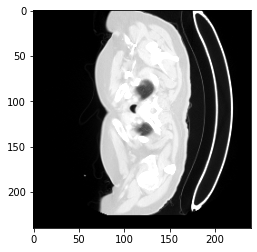

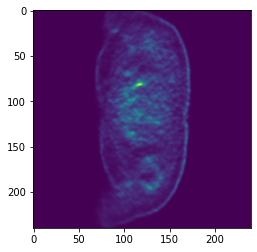

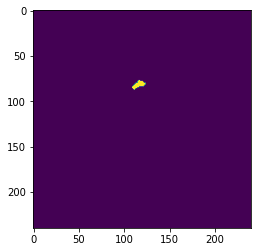

In [187]:
plt.imshow(ct_slice, cmap='gray', vmin=-1000, vmax=100)
plt.show()
plt.imshow(petsuv_slice)
plt.show()
plt.imshow(label_slice)
plt.show()

### Load dataset into memory

In [10]:
data_dict = {}

hdf5_path = work_dir.joinpath('petbc_lesions_pet_test.h5')

# start timer
t = time.perf_counter()
with h5py.File(hdf5_path, 'r', driver='core') as hdf:
    print(f'elapsed_time: {time.perf_counter() - t}s')
    for name in hdf['petsuv']:
        a = hdf[f'petsuv/{name}'][:,:,50]
        print(f'elapsed_time: {time.perf_counter() - t}s')

elapsed_time: 25.440600693924353s
elapsed_time: 25.453888460993767s
elapsed_time: 25.465410408913158s
elapsed_time: 25.483811139012687s
elapsed_time: 25.5023267819779s
elapsed_time: 25.520567402010784s
elapsed_time: 25.546485841972753s
elapsed_time: 25.558405081974342s
elapsed_time: 25.577157589956187s
elapsed_time: 25.59571448690258s
elapsed_time: 25.61426197295077s
elapsed_time: 25.63308972795494s
elapsed_time: 25.668052630964667s
elapsed_time: 25.679715181002393s
elapsed_time: 25.706622208002955s
elapsed_time: 25.72548994596582s
elapsed_time: 25.737039411906153s
elapsed_time: 25.748589996015653s
elapsed_time: 25.773181516909972s
elapsed_time: 25.78554166899994s
elapsed_time: 25.81369453901425s
elapsed_time: 25.845351904979907s
elapsed_time: 25.876881319913082s
elapsed_time: 25.895447034970857s
elapsed_time: 25.918898989912122s
elapsed_time: 25.942864105920307s
elapsed_time: 25.954683084972203s
elapsed_time: 25.967143129906617s
elapsed_time: 25.97914099798072s
elapsed_time: 25.990948